# Name: Team-10 project

# Project Name: Recognition Plant Diseases By Leaf !!!

# Final Project 

## Dataset Link: https://www.kaggle.com/vipoooool/new-plant-diseases-dataset

# ---------------------------------------------------------------------------------------------------------------

# Imported all requried all libraries

In [1]:
import os
import cv2
import glob
import torch
import pickle
import PIL
import torchvision
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torchvision.transforms as tt
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from tensorflow.keras.layers import LayerNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow_hub as hub
import warnings
warnings.filterwarnings("ignore")

# Checking tensorflow version

In [2]:
tf.__version__

'2.7.0'

# Functions:

In [3]:
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count  

In [4]:
def show_image(dl):
    for images, labels in dl:
        plt.figure(figsize=(16,8))
        print("images.shape :", images.size)
        plt.imshow(make_grid(images[:64], nrow=8).permute(1,2,0))
        break

In [5]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image, DEFAULT_IMAGE_SIZE)   
            return img_to_array(image)
        else:
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

# Dataset Path

In [6]:
zip_file = "New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"

# Checking path exist or not

In [7]:
a=os.path.exists(zip_file)
if a==True:
    print("Path exit!!!")

Path exit!!!


# Train dataset path

In [8]:
train_path = 'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
train_path

'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'

# Checking given path exist or not:

In [9]:
a=os.path.exists(train_path)
if a==True:
    print("Path exit!!!")

Path exit!!!


# Number of images:

In [10]:
train_samples =get_files(train_path)
print("Images in train:",train_samples)

Images in train: 70294


# Number of classes:

In [11]:
num_classes=len(glob.glob(train_path+"/*"))
print("Classes in train:",num_classes)

Classes in train: 38


# Classes list:

In [12]:
for i in os.listdir(train_path):
    print(i)

Apple___Apple_scab
Apple___Black_rot
Apple___Cedar_apple_rust
Apple___healthy
Blueberry___healthy
Cherry_(including_sour)___healthy
Cherry_(including_sour)___Powdery_mildew
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Corn_(maize)___Common_rust_
Corn_(maize)___healthy
Corn_(maize)___Northern_Leaf_Blight
Grape___Black_rot
Grape___Esca_(Black_Measles)
Grape___healthy
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Orange___Haunglongbing_(Citrus_greening)
Peach___Bacterial_spot
Peach___healthy
Pepper,_bell___Bacterial_spot
Pepper,_bell___healthy
Potato___Early_blight
Potato___healthy
Potato___Late_blight
Raspberry___healthy
Soybean___healthy
Squash___Powdery_mildew
Strawberry___healthy
Strawberry___Leaf_scorch
Tomato___Bacterial_spot
Tomato___Early_blight
Tomato___healthy
Tomato___Late_blight
Tomato___Leaf_Mold
Tomato___Septoria_leaf_spot
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Target_Spot
Tomato___Tomato_mosaic_virus
Tomato___Tomato_Yellow_Leaf_Curl_Virus


# Transforming:

In [13]:
train_tfms = tt.Compose([tt.Resize(128),tt.RandomHorizontalFlip(),tt.ToTensor(),tt.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
train_tfms

Compose(
    Resize(size=128, interpolation=bilinear, max_size=None, antialias=None)
    RandomHorizontalFlip(p=0.5)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

# Image floder:

In [14]:
train_ds = ImageFolder(train_path, train_tfms)
train_ds

Dataset ImageFolder
    Number of datapoints: 70294
    Root location: New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train
    StandardTransform
Transform: Compose(
               Resize(size=128, interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

# Data loading:

In [15]:
batch_size = num_classes

In [16]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
train_dl

# Images of classes:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


images.shape : <built-in method size of Tensor object at 0x000001D6E1A9CEA0>


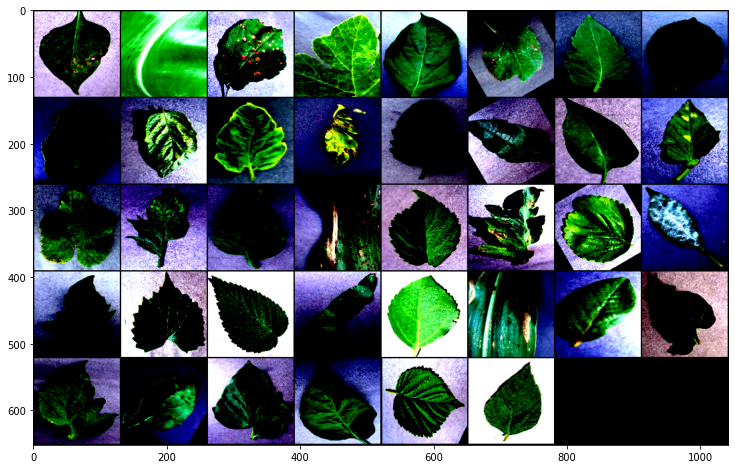

In [17]:
show_image(train_dl)

# Valid dataset path

In [18]:
val_path = 'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
val_path

'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

# Checking given path exist or not:

In [19]:
a=os.path.exists(val_path)
if a==True:
    print("Path exit!!!")

Path exit!!!


# Number of images:¶

In [20]:
test_samples=get_files(val_path)
print("Images in valid:",test_samples)

Images in valid: 17572


# Number of classes:

In [21]:
num_classes=len(glob.glob(val_path+"/*"))
print("Classes in valid:",num_classes)

Classes in valid: 38


# Classes list:

In [22]:
for i in os.listdir(val_path):
    print(i)

Apple___Apple_scab
Apple___Black_rot
Apple___Cedar_apple_rust
Apple___healthy
Blueberry___healthy
Cherry_(including_sour)___healthy
Cherry_(including_sour)___Powdery_mildew
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Corn_(maize)___Common_rust_
Corn_(maize)___healthy
Corn_(maize)___Northern_Leaf_Blight
Grape___Black_rot
Grape___Esca_(Black_Measles)
Grape___healthy
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Orange___Haunglongbing_(Citrus_greening)
Peach___Bacterial_spot
Peach___healthy
Pepper,_bell___Bacterial_spot
Pepper,_bell___healthy
Potato___Early_blight
Potato___healthy
Potato___Late_blight
Raspberry___healthy
Soybean___healthy
Squash___Powdery_mildew
Strawberry___healthy
Strawberry___Leaf_scorch
Tomato___Bacterial_spot
Tomato___Early_blight
Tomato___healthy
Tomato___Late_blight
Tomato___Leaf_Mold
Tomato___Septoria_leaf_spot
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Target_Spot
Tomato___Tomato_mosaic_virus
Tomato___Tomato_Yellow_Leaf_Curl_Virus


# Transforming:

In [23]:
val_tfms = tt.Compose([tt.Resize(128),tt.ToTensor(),tt.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),])
val_tfms

Compose(
    Resize(size=128, interpolation=bilinear, max_size=None, antialias=None)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

# Image Folder:

In [24]:
val_ds = ImageFolder(val_path, val_tfms)
val_ds

Dataset ImageFolder
    Number of datapoints: 17572
    Root location: New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid
    StandardTransform
Transform: Compose(
               Resize(size=128, interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

# Data Loading:

In [25]:
batch_size = num_classes
val_dl = DataLoader(val_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl

# Images of classes:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


images.shape : <built-in method size of Tensor object at 0x000001D6E27CD8B0>


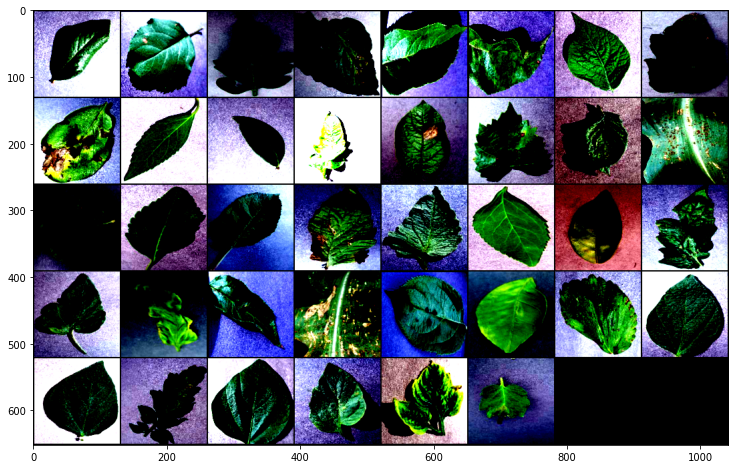

In [26]:
show_image(val_dl)

# Test Dataset path:

In [27]:
test_path = 'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
test_path

'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

# Checking given path exist or not:

In [28]:
a=os.path.exists(test_path)
if a==True:
    print("Path exit!!!")

Path exit!!!


# Number of images:

In [29]:
test_samples=get_files(test_path)
print(test_samples,"Test images")

17572 Test images


# Number of classes:

In [30]:
num_classes=len(glob.glob(test_path+"/*"))
print(num_classes,"classes in test")

38 classes in test


# Classes list:

In [31]:
for i in os.listdir(test_path):
    print(i)

Apple___Apple_scab
Apple___Black_rot
Apple___Cedar_apple_rust
Apple___healthy
Blueberry___healthy
Cherry_(including_sour)___healthy
Cherry_(including_sour)___Powdery_mildew
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Corn_(maize)___Common_rust_
Corn_(maize)___healthy
Corn_(maize)___Northern_Leaf_Blight
Grape___Black_rot
Grape___Esca_(Black_Measles)
Grape___healthy
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Orange___Haunglongbing_(Citrus_greening)
Peach___Bacterial_spot
Peach___healthy
Pepper,_bell___Bacterial_spot
Pepper,_bell___healthy
Potato___Early_blight
Potato___healthy
Potato___Late_blight
Raspberry___healthy
Soybean___healthy
Squash___Powdery_mildew
Strawberry___healthy
Strawberry___Leaf_scorch
Tomato___Bacterial_spot
Tomato___Early_blight
Tomato___healthy
Tomato___Late_blight
Tomato___Leaf_Mold
Tomato___Septoria_leaf_spot
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Target_Spot
Tomato___Tomato_mosaic_virus
Tomato___Tomato_Yellow_Leaf_Curl_Virus


# Transforming:

In [32]:
test_tfms = tt.Compose([tt.Resize(128),tt.ToTensor(),tt.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),])
test_tfms

Compose(
    Resize(size=128, interpolation=bilinear, max_size=None, antialias=None)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

# Image Folder:

In [33]:
test_ds = ImageFolder(test_path, test_tfms)
test_ds

Dataset ImageFolder
    Number of datapoints: 17572
    Root location: New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid
    StandardTransform
Transform: Compose(
               Resize(size=128, interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

# Data Loading:

In [34]:
batch_size = num_classes
test_dl = DataLoader(test_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
test_dl

# Images of classes:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


images.shape : <built-in method size of Tensor object at 0x000001D6E2E85860>


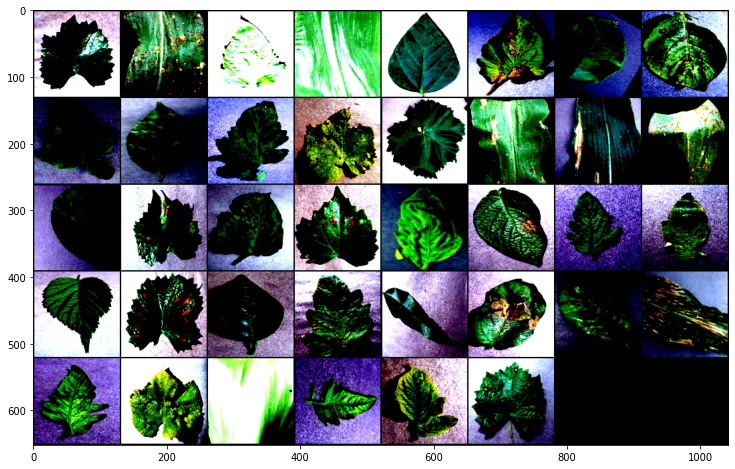

In [35]:
show_image(test_dl)

# ------------------------------------- OpenCV & ImageProcessing --------------------------------

In [36]:
print(cv2.__version__)

4.5.5


# Image Acquisition:

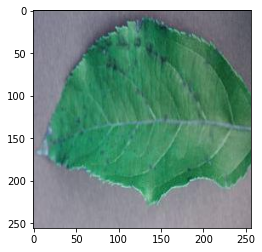

In [37]:
img = cv2.imread('New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/0a5e9323-dbad-432d-ac58-d291718345d9___FREC_Scab 3417_90deg.jpg')
plt.imshow(img)
plt.show()

# Color Image Processing

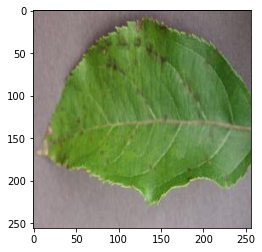

In [38]:
cvt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(cvt)

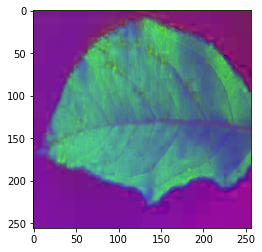

In [39]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(hsv_img)

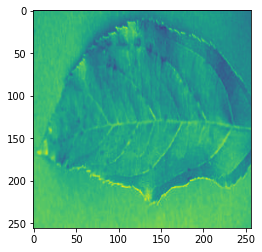

In [40]:
gray_image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image)

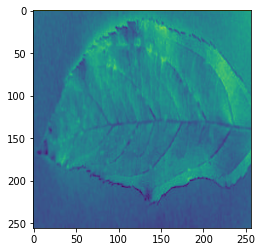

In [41]:
inverted_image = cv2.bitwise_not(gray_image)
plt.imshow(inverted_image)

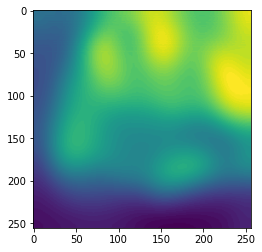

In [42]:
blurred = cv2.GaussianBlur(inverted_image, (111,111),0)
plt.imshow(blurred)

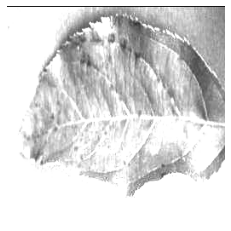

In [43]:
sketch_image=cv2.divide(gray_image,inverted_image, scale=256.0)
pencil_sketch=cv2.cvtColor(sketch_image, cv2.COLOR_BGR2RGB)
plt.imshow(pencil_sketch)
plt.axis('off')
plt.show()

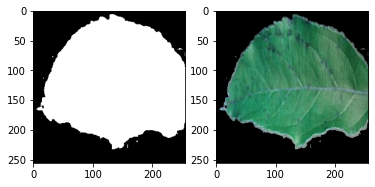

In [44]:
lower_green = np.array([25,0,20])
upper_green = np.array([100,255,255])
mask = cv2.inRange(hsv_img, lower_green, upper_green)
result = cv2.bitwise_and(img, img, mask=mask)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

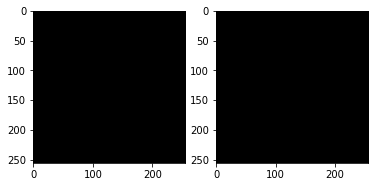

In [45]:
lower_brown = np.array([10,0,10])
upper_brown = np.array([30,255,255])
disease_mask = cv2.inRange(hsv_img, lower_brown, upper_brown)
disease_result = cv2.bitwise_and(img, img, mask=disease_mask)
plt.subplot(1, 2, 1)
plt.imshow(disease_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(disease_result)
plt.show()

# Image Enhancement

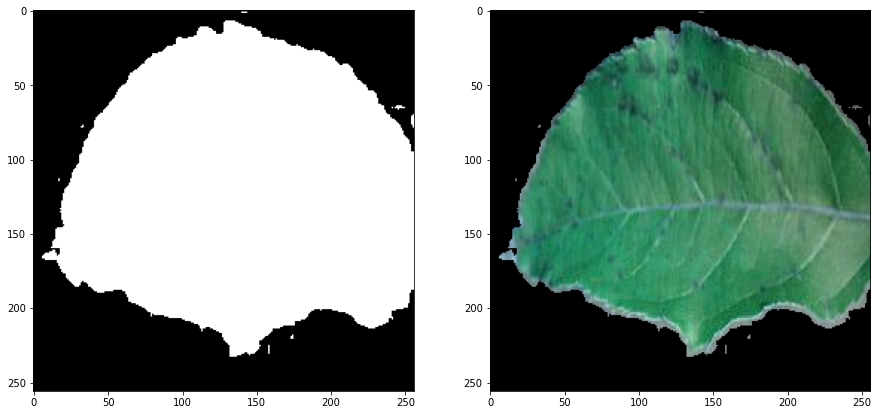

In [46]:
final_mask = mask + disease_mask
final_result = cv2.bitwise_and(img, img, mask=final_mask)
plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()

# Image Restoration


In [47]:
from keras.preprocessing import image
import numpy as np
img= image.load_img("New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/0a5e9323-dbad-432d-ac58-d291718345d9___FREC_Scab 3417_90deg.jpg")
img1 = image.load_img("New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/0a5e9323-dbad-432d-ac58-d291718345d9___FREC_Scab 3417_90deg.jpg", target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [48]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,validation_split=0.2,horizontal_flip=True)
train_datagen

In [49]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_datagen

In [50]:
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =32
train_generator =train_datagen.flow_from_directory(train_path,target_size=(img_width,img_height), batch_size=batch_size)

Found 70294 images belonging to 38 classes.


In [51]:
test_generator=test_datagen.flow_from_directory(test_path,shuffle=True,target_size=(img_width,img_height),batch_size=batch_size)

Found 17572 images belonging to 38 classes.


In [52]:
validation_generator = train_datagen.flow_from_directory(test_path, target_size=(img_height, img_width),batch_size=batch_size) 

Found 17572 images belonging to 38 classes.


# Model

In [53]:
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 84, 84, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 82, 82, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 41, 41, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 39, 39, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 64)       0

# Model layers

In [54]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'flatten', 'dense', 'dropout', 'dense_1', 'dense_2']


In [55]:
from keras.models import Model
try:
    conv2d_1_output = Model(inputs=model.input, outputs=model.get_layer('conv2d_1').output)
    max_pooling2d_1_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_1').output)
    conv2d_2_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_2').output)
    max_pooling2d_2_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_2').output)
    conv2d_1_features = conv2d_1_output.predict(img)
    max_pooling2d_1_features = max_pooling2d_1_output.predict(img)
    conv2d_2_features = conv2d_2_output.predict(img)
    max_pooling2d_2_features = max_pooling2d_2_output.predict(img)
except Exception:
    conv2d_3_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_3').output)
    max_pooling2d_3_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_3').output)
    conv2d_4_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_4').output)
    max_pooling2d_4_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_4').output)
    conv2d_5_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_5').output)
    max_pooling2d_5_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_5').output)
    flatten_1_output = Model(inputs=model.input,outputs=model.get_layer('flatten_1').output)
    conv2d_3_features = conv2d_3_output.predict(img)
    max_pooling2d_3_features = max_pooling2d_3_output.predict(img)
    conv2d_4_features = conv2d_4_output.predict(img)
    max_pooling2d_4_features = max_pooling2d_4_output.predict(img)
    conv2d_5_features = conv2d_5_output.predict(img)
    max_pooling2d_5_features = max_pooling2d_5_output.predict(img)
    flatten_1_features = flatten_1_output.predict(img)

# conv2d_1_features layer visualization

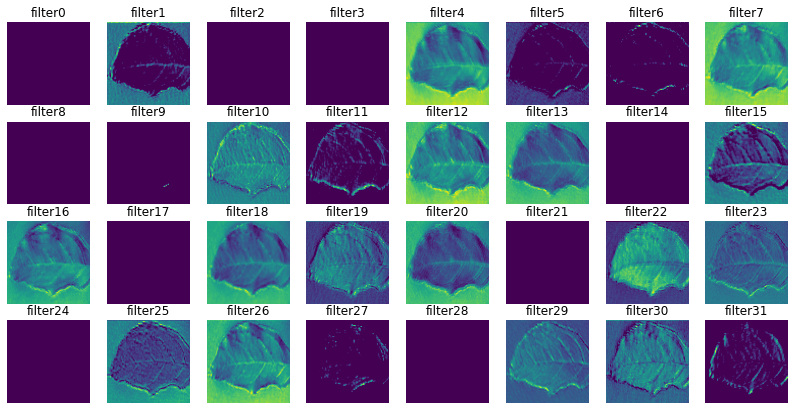

In [56]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_1_features[0, :, :, i], cmap='viridis') 
plt.show()

# max_pooling2d_1_features layer visualization

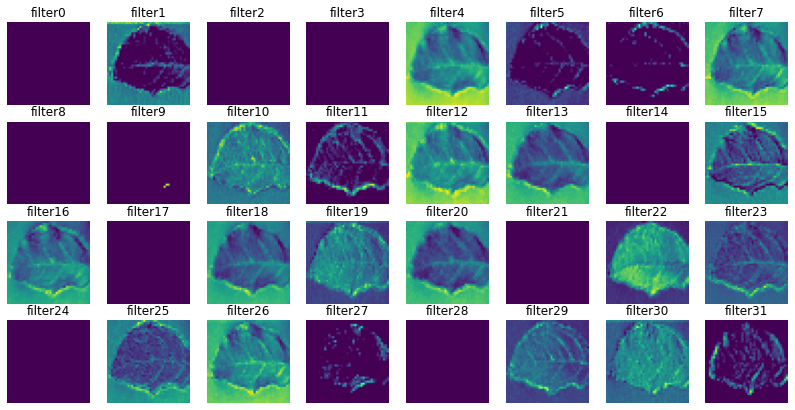

In [57]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_1_features[0, :, :, i], cmap='viridis')
plt.show()

# conv2d_2_features layer visualization

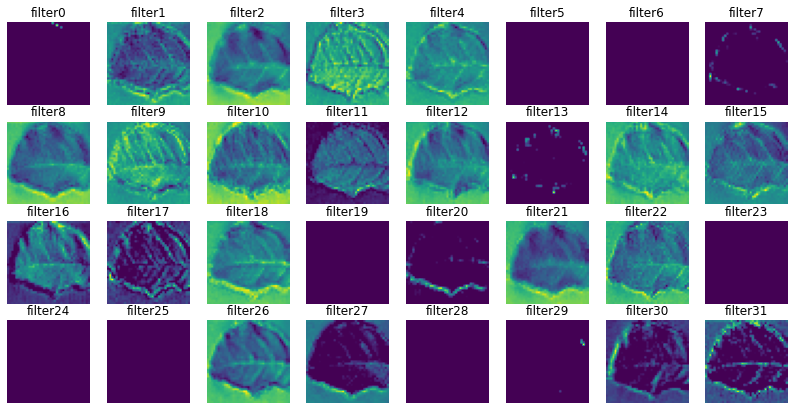

In [58]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_2_features[0, :, :, i], cmap='viridis')
plt.show()

# max_pooling2d_2_features layer visualization

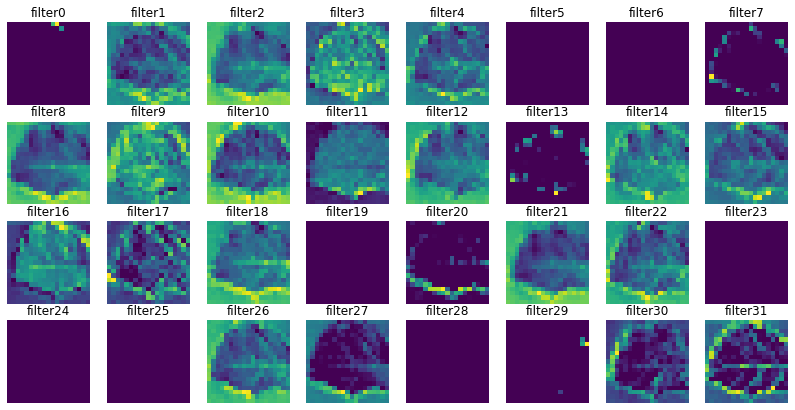

In [59]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_2_features[0, :, :, i], cmap='viridis') 
plt.show()

# Optimizing model & compiling model

In [60]:
opt=tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])


# Model fitting

In [61]:
train=model.fit_generator(train_generator,epochs=15,steps_per_epoch=train_generator.samples // batch_size,validation_data=validation_generator,validation_steps= validation_generator.samples// batch_size,verbose=1)

Epoch 1/15
2196/2196 [==============================] - 5970s 3s/step - loss: 1.3157 - accuracy: 0.6057 - val_loss: 0.5642 - val_accuracy: 0.8177
Epoch 2/15
2196/2196 [==============================] - 5798s 3s/step - loss: 0.5193 - accuracy: 0.8311 - val_loss: 0.3091 - val_accuracy: 0.8993
Epoch 3/15
2196/2196 [==============================] - 15893s 7s/step - loss: 0.3771 - accuracy: 0.8770 - val_loss: 0.2785 - val_accuracy: 0.9095
Epoch 4/15
2196/2196 [==============================] - 11549s 5s/step - loss: 0.3098 - accuracy: 0.8992 - val_loss: 0.2734 - val_accuracy: 0.9106
Epoch 5/15
2196/2196 [==============================] - 8131s 4s/step - loss: 0.2708 - accuracy: 0.9128 - val_loss: 0.2171 - val_accuracy: 0.9295
Epoch 6/15
2196/2196 [==============================] - 4541s 2s/step - loss: 0.2459 - accuracy: 0.9195 - val_loss: 0.1966 - val_accuracy: 0.9354
Epoch 7/15
2196/2196 [==============================] - 4313s 2s/step - loss: 0.2205 - accuracy: 0.9301 - val_loss: 0.1758

In [62]:
acc = train.history['accuracy']
val_acc = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(1, len(acc) + 1)


# Training V/s Validation Accurracy

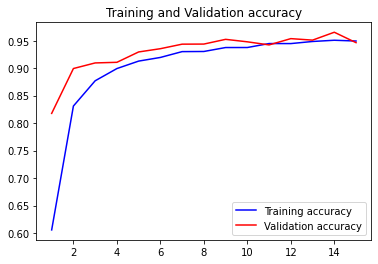

In [63]:
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.show()

# Training V/s Validation Loss

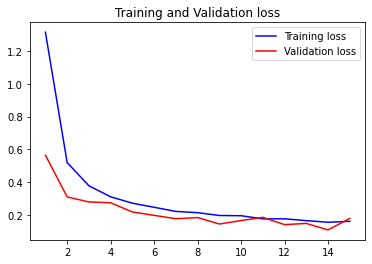

In [64]:
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

# Testing Model

In [65]:
score,accuracy =model.evaluate(test_generator,verbose=1)

550/550 [==============================] - 197s 357ms/step - loss: 0.1503 - accuracy: 0.9575


# Test Loss Score

In [66]:
print("Test Loss Score is {}".format(score))

Test Loss Score is 0.15027685463428497


# Test Accuracy Score

In [67]:
print("Test Accuracy Score is {}".format(accuracy))

Test Accuracy Score is 0.9574891924858093


# Model Saving

In [ ]:
from keras.models import load_model
model.save('Prathamesh.h5')

# Converting model as tflite

In [ ]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model_file('Prathmesh.h5') 
tfmodel = converter.convert() 
open ("Prathmesh.tflite" , "wb") .write(tfmodel)

# Model Prediction:

In [2]:
import tensorflow.keras
from PIL import Image, ImageOps
import numpy as np
class_na = ['Apple scab', 'Apple Black rot', 'Apple Cedar rust', 'Apple healthy', 'Blueberry healthy',
            'Cherry healthy','Cherry Powdery mildew',  
            'Corn Cercospora Gray leaf spot', 'Corn Common rust', 
            'Corn healthy','Corn Northern Leaf Blight',  'Grape Black rot', 
            'Grape Esca Black Measles','Grape healthy',  'Grape Leaf blight Isariopsis', 
            'Orange Haunglongbing Citrus greening', 'Peach Bacterial spot', 'Peach healthy', 
            'Pepper bell Bacterial spot', 'Pepper bell healthy', 'Potato Early blight', 'Potato healthy',
            'Potato Late blight', 'Raspberry healthy', 'Soybean healthy', 'Squash Powdery mildew', 
            'Strawberry healthy','Strawberry Leaf scorch', 'Tomato Bacterial spot', 'Tomato Early blight', 
            'Tomato healthy', 'Tomato Late blight', 'Tomato Leaf Mold', 
            'Tomato Septoria leaf spot', 'Tomato Two spotted spider mite', 'Tomato Target Spot',
            'Tomato mosaic virus', 'Tomato Yellow Leaf Curl Virus']

In [3]:
np.set_printoptions(suppress=True)

In [4]:
model= tensorflow.keras.models.load_model('Prathamesh.h5')

In [5]:
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

Input:Apple.jpg

Prediction: Apple healthy

Confident: 99.99997615814209
Wall time: 0 ns


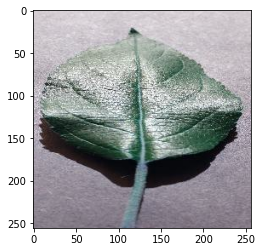

In [6]:
img_path = input("Input:")
image = Image.open(img_path)
img = cv2.imread(img_path)
plt.imshow(img)
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)
image_array = np.asarray(image)
normalized_image_array = (image_array.astype(np.float32) / 127.0)
data[0] = normalized_image_array
prediction = model.predict(data)
print("\nPrediction:",class_na[np.argmax(prediction)])
print("\nConfident:",100 * np.max(prediction))
%time

# ------------------------------------------- Thank You ---------------------------------------------------